<a href="https://colab.research.google.com/github/arkapravajas/ML-Project--Phone-Price-Prediction-/blob/Code/ML_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librabies Used in this Project

In [ ]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor, Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline

Load the Dataset

In [ ]:
raw_data = pd.read_csv('/content/Mobile phone price (2).csv')
# Display the first few rows of the dataset
raw_data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [ ]:
raw_data.shape

(407, 8)

In [ ]:
# Display basic statistics
raw_data.describe()

,Battery Capacity (mAh)
count,407.000000
mean,4676.476658
std,797.193713
min,1821.000000
25%,4300.000000
50%,5000.000000
75%,5000.000000
max,7000.000000


3. Data Preprocessing

In [ ]:
# Checking for missing values
raw_data.isnull().sum()

,0
Brand,0
Model,0
Storage,0
RAM,0
Screen Size (inches),0
Camera (MP),0
Battery Capacity (mAh),0
Price ($),0


In [ ]:
# Checking for duplicated values
raw_data.duplicated().sum()

np.int64(26)

In [ ]:
# Removing duplicates
raw_data = raw_data.drop_duplicates()
raw_data

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099


In [ ]:
# Drop the "Model" column
data = raw_data.drop(columns=['Model'])
data.head()

,Brand,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,128 GB,8 GB,6.4,50 + 12.2,4614,799


Suffleing the data

In [ ]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
print(data.columns)
data.columns = data.columns.str.replace(" ","")
data.columns

Index(['Brand', 'Storage ', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')


Index(['Brand', 'Storage', 'RAM', 'ScreenSize(inches)', 'Camera(MP)',
       'BatteryCapacity(mAh)', 'Price($)'],
      dtype='object')

In [ ]:
# Rename some Features
data.rename(columns={"Storage":"Storage(GB)","RAM":"RAM(GB)"}, inplace =True)
data.columns

Index(['Brand', 'Storage(GB)', 'RAM(GB)', 'ScreenSize(inches)', 'Camera(MP)',
       'BatteryCapacity(mAh)', 'Price($)'],
      dtype='object')

In [ ]:
# Encode 'Brand' column
lebel_encoder = LabelEncoder()
data['Brand_Encoded'] = lebel_encoder.fit_transform(data['Brand'])
data['Brand_Encoded'].value_counts()
data['Brand'].value_counts()

,count
Brand,
Samsung,73
Xiaomi,62
Oppo,53
Realme,43
Vivo,33
Apple,28
Nokia,24
Motorola,22
OnePlus,14


Data Cleaning

In [ ]:
data["Storage(GB)"] = data["Storage(GB)"].str.replace("GB", "").astype(int)
data["Storage(GB)"].value_counts()

,count
Storage(GB),
128,233
64,78
256,40
32,27
512,3


In [ ]:
data["RAM(GB)"] = data["RAM(GB)"].str.replace("GB","").astype(int)
data["RAM(GB)"].value_counts()

,count
RAM(GB),
4,121
6,99
8,90
3,33
12,25
2,11
5,1
16,1


In [ ]:
data["ScreenSize(inches)"] = data["ScreenSize(inches)"].str.replace("(unfolded)", "").str.replace("6.8 + 3.9", "6.8").astype(float)
data["ScreenSize(inches)"].value_counts()

,count
ScreenSize(inches),
6.50,100
6.67,26
6.40,26
6.70,24
6.55,21
6.43,20
6.51,17
6.10,16
6.53,15


In [ ]:
data["Camera(MP)"] = data["Camera(MP)"].str.replace("MP","").str.split("+")
data["Camera(MP)"] = data["Camera(MP)"].str[0]
data["Camera(MP)"] = data["Camera(MP)"].str.replace("12.2" ,"12").astype(int)
data["Camera(MP)"].value_counts()

,count
Camera(MP),
48,110
64,82
13,64
50,49
12,44
108,19
8,7
16,3
40,2


In [ ]:
data["BatteryCapacity(mAh)"] = data["BatteryCapacity(mAh)"].astype(int)
data["BatteryCapacity(mAh)"].value_counts()

,count
BatteryCapacity(mAh),
5000,150
4500,42
6000,39
4000,33
5020,13
4310,9
4200,8
4300,6
4250,6


In [ ]:
data["Price($)"] = data["Price($)"].str.replace("$","").str.replace(",","")
data["Price($)"] = data["Price($)"].astype(float)
data["Price($)"].value_counts()

,count
Price($),
199.0,26
279.0,23
179.0,19
299.0,19
399.0,18
249.0,18
149.0,17
329.0,16
699.0,15


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Brand                 381 non-null    object 
 1   Storage(GB)           381 non-null    int64  
 2   RAM(GB)               381 non-null    int64  
 3   ScreenSize(inches)    381 non-null    float64
 4   Camera(MP)            381 non-null    int64  
 5   BatteryCapacity(mAh)  381 non-null    int64  
 6   Price($)              381 non-null    float64
 7   Brand_Encoded         381 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 23.9+ KB


In [ ]:
# Split the dataset into features (X) and target (y)
features = ['Brand_Encoded', 'RAM(GB)', 'Storage(GB)', 'ScreenSize(inches)', 'Camera(MP)',
'BatteryCapacity(mAh)']
target = 'Price($)'
X = data[features]
y = data[target]

In [ ]:
# Split the transformed data into training and test sets

# First split: 70% train, 30% temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: 20% validation, 10% test (out of total)
# 20 / (20+10) = 0.67 -> validation proportion in X_temp
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)


@ Performance Metrics Functions [MSE,MSA,R^2]

In [ ]:
# Calculate performance metrics
def calculate_performance_metrics(y_test, y_pred):
    # Calculate R-squared
    r2 = r2_score(y_test, y_pred)
    # Calculate Mean Absolute Error
    mae = mean_absolute_error(y_test, y_pred)
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    return r2, mae, mse

In [ ]:
def k_fold_evaluation(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    mse_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print(f"\nK-Fold Validation ({cv}-fold):")
    print(f"Average MSE: {mse_scores.mean():.2f}")
    print(f"Average MAE: {mae_scores.mean():.2f}")
    print(f"Average R² : {r2_scores.mean():.2f}")
    return mse_scores.mean(), mae_scores.mean(), r2_scores.mean()


Simple Linear Regression

In [ ]:
# Create and train the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# --- Validation evaluation (20%) ---
y_val_pred = model_lr.predict(X_val)
r2_val_lr, mae_val_lr, mse_val_lr = calculate_performance_metrics(y_val, y_val_pred)
print("\nValidation Results (Linear Regression)")
print(f"MSE : {mse_val_lr:.2f}")
print(f"MAE : {mae_val_lr:.2f}")
print(f"R²  : {r2_val_lr:.2f}")

# --- Test evaluation (10%) ---
y_pred_lr = model_lr.predict(X_test)
r2_lr, mae_lr, mse_lr = calculate_performance_metrics(y_test, y_pred_lr)
print("\nTest Results (Linear Regression)")
print(f"MSE : {mse_lr:.2f}")
print(f"MAE : {mae_lr:.2f}")
print(f"R²  : {r2_lr:.2f}")

k_fold_evaluation(model_lr, X, y, cv=5)


Validation Results (Linear Regression)
MSE : 34624.11
MAE : 129.29
R²  : 0.68

Test Results (Linear Regression)
MSE : 17119.27
MAE : 106.30
R²  : 0.73

K-Fold Validation (5-fold):
Average MSE: 25872.11
Average MAE: 118.66
Average R² : 0.72


(np.float64(25872.11215778329),
 np.float64(118.65908132317477),
 np.float64(0.724378900822541))

Polynomial Regression

For Degree 2

In [ ]:
# Fit the linear model on polynomial features
poly_2 = PolynomialFeatures(degree=2)
X_poly_train_2 = poly_2.fit_transform(X_train)
X_poly_test_2 = poly_2.transform(X_test)
X_poly_val_2 = poly_2.transform(X_val)
#Fit the Linear Model: Fit a linear regression model using the polynomial features.
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_train_2, y_train)

# --- Validation ---
y_val_pred_2 = model_poly_2.predict(X_poly_val_2)
r2_val_2, mae_val_2, mse_val_2 = calculate_performance_metrics(y_val, y_val_pred_2)
print("\nValidation Results (Polynomial Regression Degree 2)")
print(f"MSE : {mse_val_2:.2f}")
print(f"MAE : {mae_val_2:.2f}")
print(f"R²  : {r2_val_2:.2f}")

# --- Test ---
y_pred_2 = model_poly_2.predict(X_poly_test_2)
r2_poly_2, mae_poly_2, mse_poly_2 = calculate_performance_metrics(y_test, y_pred_2)
print("\nTest Results (Polynomial Regression Degree 2)")
print(f"MSE : {mse_poly_2:.2f}")
print(f"MAE : {mae_poly_2:.2f}")
print(f"R²  : {r2_poly_2:.2f}")
k_fold_evaluation(model_poly_2, X, y, cv=5)


Validation Results (Polynomial Regression Degree 2)
MSE : 36389.72
MAE : 127.35
R²  : 0.66

Test Results (Polynomial Regression Degree 2)
MSE : 15730.50
MAE : 92.00
R²  : 0.75

K-Fold Validation (5-fold):
Average MSE: 25872.11
Average MAE: 118.66
Average R² : 0.72


(np.float64(25872.11215778329),
 np.float64(118.65908132317477),
 np.float64(0.724378900822541))

For Degree 3

In [ ]:
# Fit the linear model on polynomial features
poly_3 = PolynomialFeatures(degree=3)
X_poly_train_3 = poly_3.fit_transform(X_train)
X_poly_val_3 = poly_3.transform(X_val)
X_poly_test_3 = poly_3.transform(X_test)
#Fit the Linear Model: Fit a linear regression model using the polynomial features.
model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly_train_3, y_train)
# --- Validation (20%) ---
y_val_pred_3 = model_poly_3.predict(X_poly_val_3)
r2_val_3, mae_val_3, mse_val_3 = calculate_performance_metrics(y_val, y_val_pred_3)
print("\nValidation Results (Polynomial Regression Degree 3)")
print(f"MSE : {mse_val_3:.2f}")
print(f"MAE : {mae_val_3:.2f}")
print(f"R²  : {r2_val_3:.2f}")

# --- Test (10%) ---
y_pred_3 = model_poly_3.predict(X_poly_test_3)
r2_poly_3, mae_poly_3, mse_poly_3 = calculate_performance_metrics(y_test, y_pred_3)
print("\nTest Results (Polynomial Regression Degree 3)")
print(f"MSE : {mse_poly_3:.2f}")
print(f"MAE : {mae_poly_3:.2f}")
print(f"R²  : {r2_poly_3:.2f}")



model_poly_3 = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
k_fold_evaluation(model_poly_3, X, y, cv=5)



Validation Results (Polynomial Regression Degree 3)
MSE : 193689.16
MAE : 186.12
R²  : -0.81

Test Results (Polynomial Regression Degree 3)
MSE : 43949.10
MAE : 120.34
R²  : 0.31

K-Fold Validation (5-fold):
Average MSE: 127306.14
Average MAE: 146.80
Average R² : -0.30


(np.float64(127306.13548190934),
 np.float64(146.7985771387732),
 np.float64(-0.30022786245178346))

For Degree 4

In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_poly_train_4 = poly_4.fit_transform(X_train)
X_poly_val_4 = poly_4.transform(X_val)
X_poly_test_4 = poly_4.transform(X_test)

model_poly_4 = LinearRegression()
model_poly_4.fit(X_poly_train_4, y_train)

# --- Validation (20%) ---
y_val_pred_4 = model_poly_4.predict(X_poly_val_4)
r2_val_4, mae_val_4, mse_val_4 = calculate_performance_metrics(y_val, y_val_pred_4)
print("\nValidation Results (Polynomial Regression Degree 4)")
print(f"MSE : {mse_val_4:.2f}")
print(f"MAE : {mae_val_4:.2f}")
print(f"R²  : {r2_val_4:.2f}")

# --- Test (10%) ---
y_pred_4 = model_poly_4.predict(X_poly_test_4)
r2_poly_4, mae_poly_4, mse_poly_4 = calculate_performance_metrics(y_test, y_pred_4)
print("\nTest Results (Polynomial Regression Degree 4)")
print(f"MSE : {mse_poly_4:.2f}")
print(f"MAE : {mae_poly_4:.2f}")
print(f"R²  : {r2_poly_4:.2f}")

model_poly_4 = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
k_fold_evaluation(model_poly_4, X, y, cv=5)


Validation Results (Polynomial Regression Degree 4)
MSE : 97473595.15
MAE : 1406.60
R²  : -911.83

Test Results (Polynomial Regression Degree 4)
MSE : 420047.04
MAE : 255.84
R²  : -5.60

K-Fold Validation (5-fold):
Average MSE: 18388500.11
Average MAE: 611.44
Average R² : -205.58


(np.float64(18388500.10925365),
 np.float64(611.439692904468),
 np.float64(-205.58173836891189))

6. Gradient Descent Methods

6.1: Batch Gradient Descent Methods

In [ ]:
# Feature Scaling for Batch Gradient Descent.
scaler_bgd = MinMaxScaler()
X_train_bgd = scaler_bgd.fit_transform(X_train)
X_test_bgd = scaler_bgd.transform(X_test)

In [ ]:
# Function for Batch Gradient Descent.
def batch_gradient_descent( X,y, learning_rate, epochs):
    lr = learning_rate
    coef_bgd = np.ones(X_train_bgd.shape[1])
    print(coef_bgd)
    intercept_bgd = 0
    history_intercept_bgd = []
    history_coef_bgd = []
    for i in range(epochs):
        y_hat_bgd = intercept_bgd + np.dot(X_train_bgd,coef_bgd)
        intercept_der_bgd = -2 * np.mean(y_train - y_hat_bgd)
        intercept_bgd = intercept_bgd - (lr * intercept_der_bgd)
        coef_der_bgd = (-2* np.dot((y_train - y_hat_bgd),X_train_bgd))/X_train_bgd.shape[0]
        coef_bgd= coef_bgd - (lr * coef_der_bgd)
        history_intercept_bgd.append(intercept_bgd)
        history_coef_bgd.append(coef_bgd)
    return intercept_bgd, coef_bgd, history_intercept_bgd, history_coef_bgd
# Fit the model
BGD = batch_gradient_descent(X_train_bgd, y_train, 0.12, 300) # learning_rate = 0.12 & epochs = 300
# Evaluate the model
bgd_intercept_ = BGD[0]
bgd_coef_ = BGD[1]
bgd_history_intercept_ = np.array(BGD[2])
bgd_history_coef_ = np.array(BGD[3])
print(bgd_intercept_, bgd_coef_, bgd_history_intercept_.reshape(-1,1), bgd_history_coef_ )

[1. 1. 1. 1. 1. 1.]
328.5370226378172 [-372.11517204  719.05166326  743.36462078  345.29438808  -89.93037229
 -295.01482081] [[ 95.38528453]
 [133.04823253]
 [149.20401137]
 [157.32702763]
 [162.4308791 ]
 [166.38127648]
 [169.87274026]
 [173.16403989]
 [176.35181737]
 [179.4723902 ]
 [182.53962767]
 [185.55904296]
 [188.53303619]
 [191.46284524]
 [194.3492715 ]
 [197.19295001]
 [199.99444999]
 [202.75431228]
 [205.47306331]
 [208.15122033]
 [210.78929343]
 [213.38778631]
 [215.94719661]
 [218.46801606]
 [220.95073062]
 [223.3958205 ]
 [225.80376028]
 [228.17501894]
 [230.51005997]
 [232.80934134]
 [235.07331567]
 [237.30243021]
 [239.49712693]
 [241.65784258]
 [243.78500873]
 [245.87905186]
 [247.94039337]
 [249.9694497 ]
 [251.9666323 ]
 [253.93234779]
 [255.8669979 ]
 [257.77097963]
 [259.64468523]
 [261.48850229]
 [263.30281376]
 [265.08799804]
 [266.84442903]
 [268.57247612]
 [270.27250433]
 [271.94487428]
 [273.58994229]
 [275.20806042]
 [276.79957649]
 [278.36483416]
 [279.90417

In [ ]:
# Define the BGD prediction function
def bgd_predict(X):
    return bgd_intercept_ + np.dot(X, bgd_coef_)
# ---------- Validation Evaluation (20%) ----------
X_val_bgd = scaler_bgd.transform(X_val)
y_val_pred_bgd = bgd_predict(X_val_bgd)
r2_val_bgd, mae_val_bgd, mse_val_bgd = calculate_performance_metrics(y_val, y_val_pred_bgd)
print("\nValidation Results (Batch Gradient Descent)")
print(f"MSE : {mse_val_bgd:.2f}")
print(f"MAE : {mae_val_bgd:.2f}")
print(f"R²  : {r2_val_bgd:.2f}")

# ---------- Test Evaluation (10%) ----------
y_test_pred_bgd = bgd_predict(X_test_bgd)
r2_bgd, mae_bgd, mse_bgd = calculate_performance_metrics(y_test, y_test_pred_bgd)
print("\nTest Results (Batch Gradient Descent)")
print(f"MSE : {mse_bgd:.2f}")
print(f"MAE : {mae_bgd:.2f}")
print(f"R²  : {r2_bgd:.2f}")


Validation Results (Batch Gradient Descent)
MSE : 31495.72
MAE : 122.00
R²  : 0.71

Test Results (Batch Gradient Descent)
MSE : 14903.54
MAE : 100.94
R²  : 0.77


6.2: Stochastic Gradient Descent Methods

In [ ]:
# ---------- Feature Scaling ----------
scaler_sgd = StandardScaler()
X_train_scaled_sgd = scaler_sgd.fit_transform(X_train)
X_val_scaled_sgd = scaler_sgd.transform(X_val)
X_test_scaled_sgd = scaler_sgd.transform(X_test)

# ---------- Model Training ----------
sgd_regressor = SGDRegressor(learning_rate='constant', max_iter=1000, eta0=0.0001, random_state=42)
sgd_regressor.fit(X_train_scaled_sgd, y_train)

# ---------- Validation Evaluation (20%) ----------
y_val_pred_sgd = sgd_regressor.predict(X_val_scaled_sgd)
r2_val_sgd, mae_val_sgd, mse_val_sgd = calculate_performance_metrics(y_val, y_val_pred_sgd)
print("\nValidation Results (Stochastic Gradient Descent)")
print(f"MSE : {mse_val_sgd:.2f}")
print(f"MAE : {mae_val_sgd:.2f}")
print(f"R²  : {r2_val_sgd:.2f}")

# ---------- Test Evaluation (10%) ----------
y_pred_sgd = sgd_regressor.predict(X_test_scaled_sgd)
r2_sgd, mae_sgd, mse_sgd = calculate_performance_metrics(y_test, y_pred_sgd)
print("\nTest Results (Stochastic Gradient Descent)")
print(f"MSE : {mse_sgd:.2f}")
print(f"MAE : {mae_sgd:.2f}")
print(f"R²  : {r2_sgd:.2f}")



Validation Results (Stochastic Gradient Descent)
MSE : 34640.15
MAE : 129.11
R²  : 0.68

Test Results (Stochastic Gradient Descent)
MSE : 17079.40
MAE : 106.20
R²  : 0.73


6.3: Mini Batch Gradient Descent Methods

In [ ]:
# ---------- Feature Scaling ----------
scaler_mbgd = MinMaxScaler()
X_train_mbgd = scaler_mbgd.fit_transform(X_train)
X_val_mbgd = scaler_mbgd.transform(X_val)
X_test_mbgd = scaler_mbgd.transform(X_test)

# ---------- Function Definition ----------
def mini_batch_gradient_descent(X_train, y_train, batch_size, learning_rate, n_epochs):
    n_samples, n_features = X_train.shape
    weights = np.zeros(n_features)
    bias = 0
    for epoch in range(n_epochs):
        indices = np.arange(n_samples)
        np.random.shuffle(indices)
        X_train, y_train = X_train[indices], y_train.iloc[indices]
        for start in range(0, n_samples, batch_size):
            end = min(start + batch_size, n_samples)
            X_batch = X_train[start:end]
            y_batch = y_train[start:end]
            predictions = X_batch @ weights + bias
            errors = predictions - y_batch
            weight_gradient = (2 / batch_size) * X_batch.T @ errors
            bias_gradient = (2 / batch_size) * np.sum(errors)
            weights -= learning_rate * weight_gradient
            bias -= learning_rate * bias_gradient
    return weights, bias

# ---------- Train Model ----------
weights_mbgd, bias_mbgd = mini_batch_gradient_descent(X_train_mbgd, y_train, batch_size=40, learning_rate=0.018, n_epochs=1000)

# ---------- Validation Evaluation (20%) ----------
y_val_pred_mbgd = X_val_mbgd @ weights_mbgd + bias_mbgd
r2_val_mbgd, mae_val_mbgd, mse_val_mbgd = calculate_performance_metrics(y_val, y_val_pred_mbgd)
print("\nValidation Results (Mini-Batch Gradient Descent)")
print(f"MSE : {mse_val_mbgd:.2f}")
print(f"MAE : {mae_val_mbgd:.2f}")
print(f"R²  : {r2_val_mbgd:.2f}")

# ---------- Test Evaluation (10%) ----------
y_pred_mbgd = X_test_mbgd @ weights_mbgd + bias_mbgd
r2_mbgd, mae_mbgd, mse_mbgd = calculate_performance_metrics(y_test, y_pred_mbgd)
print("\nTest Results (Mini-Batch Gradient Descent)")
print(f"MSE : {mse_mbgd:.2f}")
print(f"MAE : {mae_mbgd:.2f}")
print(f"R²  : {r2_mbgd:.2f}")



Validation Results (Mini-Batch Gradient Descent)
MSE : 33239.84
MAE : 127.36
R²  : 0.69

Test Results (Mini-Batch Gradient Descent)
MSE : 16385.47
MAE : 105.33
R²  : 0.74


Hyperparameter Tuining(Parameter Grid Search)

In [ ]:
param_grids = {
    'LinearRegression': {},
    'Ridge': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    },
    'Lasso': {
        'alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
    },
    'ElasticNet': {
        'alpha': [0.000001, 0.00001, 0.0001, 0.001, 0.01],
        'l1_ratio': [0.1, 0.5, 0.9]
    }
}

results = []

# --- Run grid search on validation set for each model ---
for model_name, params in param_grids.items():
    print(f"\n\U0001f50d Tuning {model_name} ...")
    model = eval(model_name)()

    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='r2',
        cv=5,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_val)

    r2 = r2_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)

    results.append({
        'Model': model_name,
        'Best Parameters': grid_search.best_params_,
        'Validation R\u00b2': r2,
        'Validation MSE': mse
    })

# --- Display results ---
results_df = pd.DataFrame(results)
print("\n\U0001f4ca Hyperparameter Tuning Results:")
display(results_df)



🔍 Tuning LinearRegression ...

🔍 Tuning Ridge ...

🔍 Tuning Lasso ...

🔍 Tuning ElasticNet ...

📊 Hyperparameter Tuning Results:


,Model,Best Parameters,Validation R²,Validation MSE
0,LinearRegression,{},0.675750,34624.112142
1,Ridge,{'alpha': 1},0.678499,34330.470334
2,Lasso,{'alpha': 1},0.678955,34281.822782
3,ElasticNet,"{'alpha': 0.01, 'l1_ratio': 0.1}",0.681412,34019.442382


7. Regularization Techniques (Ridge, Lasso, Elastic Net Regression and Early Stopping)

7.1 Ridge Regularization

In [ ]:
# Initialize and train the Ridge Regression model
ridge_reg = Ridge(alpha=1)
ridge_reg.fit(X_train, y_train)

# --- Validation ---
y_val_pred_ridge = ridge_reg.predict(X_val)
r2_val_ridge, mae_val_ridge, mse_val_ridge = calculate_performance_metrics(y_val, y_val_pred_ridge)
print("\nValidation Results (Ridge Regression)")
print(f"MSE : {mse_val_ridge:.2f}")
print(f"MAE : {mae_val_ridge:.2f}")
print(f"R²  : {r2_val_ridge:.2f}")

# --- Test ---
y_pred_ridge_reg = ridge_reg.predict(X_test)
r2_ridge_reg, mae_ridge_reg, mse_ridge_reg = calculate_performance_metrics(y_test, y_pred_ridge_reg)
print("\nTest Results (Ridge Regression)")
print(f"MSE : {mse_ridge_reg:.2f}")
print(f"MAE : {mae_ridge_reg:.2f}")
print(f"R²  : {r2_ridge_reg:.2f}")



Validation Results (Ridge Regression)
MSE : 34330.47
MAE : 128.77
R²  : 0.68

Test Results (Ridge Regression)
MSE : 16920.45
MAE : 105.96
R²  : 0.73


7.2 Lasso Regularization

In [ ]:
# Initialize and train the Lasso Regression model
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X_train, y_train)

# --- Validation ---
y_val_pred_lasso = lasso_reg.predict(X_val)
r2_val_lasso, mae_val_lasso, mse_val_lasso = calculate_performance_metrics(y_val, y_val_pred_lasso)
print("\nValidation Results (Lasso Regression)")
print(f"MSE : {mse_val_lasso:.2f}")
print(f"MAE : {mae_val_lasso:.2f}")
print(f"R²  : {r2_val_lasso:.2f}")

# --- Test ---
y_pred_lasso_reg = lasso_reg.predict(X_test)
r2_lasso_reg, mae_lasso_reg, mse_lasso_reg = calculate_performance_metrics(y_test, y_pred_lasso_reg)
print("\nTest Results (Lasso Regression)")
print(f"MSE : {mse_lasso_reg:.2f}")
print(f"MAE : {mae_lasso_reg:.2f}")
print(f"R²  : {r2_lasso_reg:.2f}")



Validation Results (Lasso Regression)
MSE : 34281.82
MAE : 128.56
R²  : 0.68

Test Results (Lasso Regression)
MSE : 16870.41
MAE : 105.82
R²  : 0.73


7.3 Elastic Net Regression

In [ ]:
# Standardize the features (important for Elastic Net Regression)
scaler_enr = StandardScaler()
X_train_scaled_enr = scaler_enr.fit_transform(X_train)
X_val_scaled_enr = scaler_enr.transform(X_val)
X_test_scaled_enr = scaler_enr.transform(X_test)

elastic_net_reg = ElasticNet(alpha=0.001, l1_ratio=0.1)
elastic_net_reg.fit(X_train_scaled_enr, y_train)

# --- Validation ---
y_val_pred_enet = elastic_net_reg.predict(X_val_scaled_enr)
r2_val_enet, mae_val_enet, mse_val_enet = calculate_performance_metrics(y_val, y_val_pred_enet)
print("\nValidation Results (Elastic Net Regression)")
print(f"MSE : {mse_val_enet:.2f}")
print(f"MAE : {mae_val_enet:.2f}")
print(f"R²  : {r2_val_enet:.2f}")

# --- Test ---
y_pred_enet_reg = elastic_net_reg.predict(X_test_scaled_enr)
r2_enet_reg, mae_enet_reg, mse_enet_reg = calculate_performance_metrics(y_test, y_pred_enet_reg)
print("\nTest Results (Elastic Net Regression)")
print(f"MSE : {mse_enet_reg:.2f}")
print(f"MAE : {mae_enet_reg:.2f}")
print(f"R²  : {r2_enet_reg:.2f}")



Validation Results (Elastic Net Regression)
MSE : 34613.28
MAE : 129.24
R²  : 0.68

Test Results (Elastic Net Regression)
MSE : 17107.81
MAE : 106.27
R²  : 0.73


K-Fold Validation for Rigid,Lasso,Elastic Net

In [ ]:
k_fold_evaluation(ridge_reg, X, y, cv=5)
k_fold_evaluation(lasso_reg, X, y, cv=5)
k_fold_evaluation(elastic_net_reg, X, y, cv=5)



K-Fold Validation (5-fold):
Average MSE: 25649.97
Average MAE: 117.94
Average R² : 0.73

K-Fold Validation (5-fold):
Average MSE: 25589.28
Average MAE: 117.48
Average R² : 0.73

K-Fold Validation (5-fold):
Average MSE: 25797.98
Average MAE: 118.44
Average R² : 0.73


(np.float64(25797.979337026987),
 np.float64(118.44297844498188),
 np.float64(0.7250323407118944))

8. Normal Equation

In [ ]:
# Create normal equation function
# ---------- Normal Equation Function ----------
def normal_equation(X, y):
    X_transpose = X.T
    X_transpose_X = X_transpose.dot(X)
    X_transpose_X_inv = np.linalg.pinv(X_transpose_X)  # use pseudo-inverse for stability
    X_transpose_y = X_transpose.dot(y)
    theta = X_transpose_X_inv.dot(X_transpose_y)
    return theta

# ---------- Prediction Function ----------
def predict_ne(X, theta):
    return X.dot(theta)

# ---------- Train the model ----------
theta_ne = normal_equation(X_train, y_train)

# ---------- Validation Evaluation (20%) ----------
y_val_pred_ne = predict_ne(X_val, theta_ne)
r2_val_ne, mae_val_ne, mse_val_ne = calculate_performance_metrics(y_val, y_val_pred_ne)
print("\nValidation Results (Normal Equation)")
print(f"MSE : {mse_val_ne:.2f}")
print(f"MAE : {mae_val_ne:.2f}")
print(f"R²  : {r2_val_ne:.2f}")

# ---------- Test Evaluation (10%) ----------
y_pred_ne = predict_ne(X_test, theta_ne)
r2_ne, mae_ne, mse_ne = calculate_performance_metrics(y_test, y_pred_ne)
print("\nTest Results (Normal Equation)")
print(f"MSE : {mse_ne:.2f}")
print(f"MAE : {mae_ne:.2f}")
print(f"R²  : {r2_ne:.2f}")



Validation Results (Normal Equation)
MSE : 32689.21
MAE : 123.08
R²  : 0.69

Test Results (Normal Equation)
MSE : 15701.96
MAE : 102.55
R²  : 0.75


9. Implement linear Regression using SVD

In [ ]:
# ---------- SVD Function ----------
def svd_equation(X, y):
    # Perform Singular Value Decomposition
    U, S, Vt = np.linalg.svd(X, full_matrices=False)
    # Compute the pseudo-inverse of S
    S_inv = np.linalg.pinv(np.diag(S))
    # Compute theta using the SVD components
    theta = Vt.T @ S_inv @ U.T @ y
    return theta

# ---------- Prediction Function ----------
def predict_svd(X, theta):
    return X @ theta

# ---------- Train the model ----------
theta_svd = svd_equation(X_train, y_train)

# ---------- Validation Evaluation (20%) ----------
y_val_pred_svd = predict_svd(X_val, theta_svd)
r2_val_svd, mae_val_svd, mse_val_svd = calculate_performance_metrics(y_val, y_val_pred_svd)
print("\nValidation Results (SVD)")
print(f"MSE : {mse_val_svd:.2f}")
print(f"MAE : {mae_val_svd:.2f}")
print(f"R²  : {r2_val_svd:.2f}")

# ---------- Test Evaluation (10%) ----------
y_pred_svd = predict_svd(X_test, theta_svd)
r2_svd, mae_svd, mse_svd = calculate_performance_metrics(y_test, y_pred_svd)
print("\nTest Results (SVD)")
print(f"MSE : {mse_svd:.2f}")
print(f"MAE : {mae_svd:.2f}")
print(f"R²  : {r2_svd:.2f}")




Validation Results (SVD)
MSE : 32689.21
MAE : 123.08
R²  : 0.69

Test Results (SVD)
MSE : 15701.96
MAE : 102.55
R²  : 0.75


Representing the Test and Validation Error in Tabular form

In [ ]:
import pandas as pd

# ================= Model Names =================
models_all = [
    'Linear Regression',
    'Polynomial Regression (Degree 2)',
    'Polynomial Regression (Degree 3)',
    'Polynomial Regression (Degree 4)',
    'Batch Gradient Descent',
    'Stochastic Gradient Descent',
    'Mini-Batch Gradient Descent',
    'Ridge Regularization',
    'Lasso Regularization',
    'Elastic Net Regression',
    'Normal Equation',
    'SVD'
]

# ================= VALIDATION (20%) METRICS =================
mse_val = [mse_val_lr, mse_val_2, mse_val_3, mse_val_4, mse_val_bgd, mse_val_sgd, mse_val_mbgd,
           mse_val_ridge, mse_val_lasso, mse_val_enet, mse_val_ne, mse_val_svd]

mae_val = [mae_val_lr, mae_val_2, mae_val_3, mae_val_4, mae_val_bgd, mae_val_sgd, mae_val_mbgd,
           mae_val_ridge, mae_val_lasso, mae_val_enet, mae_val_ne, mae_val_svd]

r2_val = [r2_val_lr, r2_val_2, r2_val_3, r2_val_4, r2_val_bgd, r2_val_sgd, r2_val_mbgd,
          r2_val_ridge, r2_val_lasso, r2_val_enet, r2_val_ne, r2_val_svd]

# ================= TEST (10%) METRICS =================
mse_test = [mse_lr, mse_poly_2, mse_poly_3, mse_poly_4, mse_bgd, mse_sgd, mse_mbgd,
            mse_ridge_reg, mse_lasso_reg, mse_enet_reg, mse_ne, mse_svd]

mae_test = [mae_lr, mae_poly_2, mae_poly_3, mae_poly_4, mae_bgd, mae_sgd, mae_mbgd,
            mae_ridge_reg, mae_lasso_reg, mae_enet_reg, mae_ne, mae_svd]

r2_test = [r2_lr, r2_poly_2, r2_poly_3, r2_poly_4, r2_bgd, r2_sgd, r2_mbgd,
           r2_ridge_reg, r2_lasso_reg, r2_enet_reg, r2_ne, r2_svd]

# ================= CREATE AND DISPLAY TABLE =================
results_df = pd.DataFrame({
    'Model': models_all,
    'Validation MSE': mse_val,
    'Validation MAE': mae_val,
    'Validation R²': r2_val,
    'Test MSE': mse_test,
    'Test MAE': mae_test,
    'Test R²': r2_test
})

# Round for readability
results_df = results_df.round(3)

# Display full table (no truncation)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')

print("\n📊 Model Performance Comparison Table (Validation vs Test):\n")
print(results_df.to_string(index=False))



📊 Model Performance Comparison Table (Validation vs Test):

             Model                Validation MSE  Validation MAE  Validation R²  Test MSE   Test MAE  Test R²
               Linear Regression      34624.112       129.294          0.676     17119.271  106.296    0.731 
Polynomial Regression (Degree 2)      36389.717       127.353          0.659     15730.499   92.004    0.753 
Polynomial Regression (Degree 3)     193689.156       186.123         -0.814     43949.103  120.343    0.309 
Polynomial Regression (Degree 4)   97473595.150      1406.605       -911.828    420047.038  255.838   -5.604 
          Batch Gradient Descent      31495.716       122.001          0.705     14903.545  100.939    0.766 
     Stochastic Gradient Descent      34640.155       129.109          0.676     17079.404  106.201    0.731 
     Mini-Batch Gradient Descent      33239.844       127.361          0.689     16385.474  105.328    0.742 
            Ridge Regularization      34330.470       128.7

K-Fold Validation Results(K=5)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold

# Model names
models_kfold = [
    'Linear Regression',
    'Polynomial Regression (Degree 2)',
    'Polynomial Regression (Degree 3)',
    'Polynomial Regression (Degree 4)',
    'Ridge Regression',
    'Lasso Regression',
    'Elastic Net Regression'
]

mse_kfold, mae_kfold, r2_kfold = [], [], []

# ---- Linear Regression ----
mse_lr_k, mae_lr_k, r2_lr_k = k_fold_evaluation(LinearRegression(), X, y, cv=5)
mse_kfold.append(mse_lr_k); mae_kfold.append(mae_lr_k); r2_kfold.append(r2_lr_k)

# ---- Polynomial Regression (deg 2, 3, 4) ----
for d in [2, 3, 4]:
    model_poly = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    mse, mae, r2 = k_fold_evaluation(model_poly, X, y, cv=5)
    mse_kfold.append(mse); mae_kfold.append(mae); r2_kfold.append(r2)

# ---- Ridge ----
mse_ridge_k, mae_ridge_k, r2_ridge_k = k_fold_evaluation(Ridge(alpha=0.0001), X, y, cv=5)
mse_kfold.append(mse_ridge_k); mae_kfold.append(mae_ridge_k); r2_kfold.append(r2_ridge_k)

# ---- Lasso ----
mse_lasso_k, mae_lasso_k, r2_lasso_k = k_fold_evaluation(Lasso(alpha=0.00001), X, y, cv=5)
mse_kfold.append(mse_lasso_k); mae_kfold.append(mae_lasso_k); r2_kfold.append(r2_lasso_k)

# ---- Elastic Net ----
mse_elastic_k, mae_elastic_k, r2_elastic_k = k_fold_evaluation(
    ElasticNet(alpha=0.000001, l1_ratio=0.0001), X, y, cv=5)
mse_kfold.append(mse_elastic_k); mae_kfold.append(mae_elastic_k); r2_kfold.append(r2_elastic_k)
# ================== Create DataFrame ==================
kfold_results = pd.DataFrame({
    'Model': models_kfold,
    'K-Fold MSE': mse_kfold,
    'K-Fold MAE': mae_kfold,
    'K-Fold R²': r2_kfold
}).round(3)

# ================== Highlight Best Models ==================
def highlight_best(s):
    """Highlight min for errors and max for R²."""
    is_r2 = 'R²' in s.name
    if is_r2:
        best = s.max()
        return ['background-color: lightgreen; font-weight: bold' if v == best else '' for v in s]
    else:
        best = s.min()
        return ['background-color: lightgreen; font-weight: bold' if v == best else '' for v in s]

styled_table = kfold_results.style.apply(highlight_best, subset=['K-Fold MSE', 'K-Fold MAE', 'K-Fold R²'])

# ================== Display Table ==================
print("\n📊 K-Fold Cross-Validation Results (Average of 5 Folds):\n")
display(styled_table)



K-Fold Validation (5-fold):
Average MSE: 25872.11
Average MAE: 118.66
Average R² : 0.72

K-Fold Validation (5-fold):
Average MSE: 27329.29
Average MAE: 106.81
Average R² : 0.72

K-Fold Validation (5-fold):
Average MSE: 127306.14
Average MAE: 146.80
Average R² : -0.30

K-Fold Validation (5-fold):
Average MSE: 18388500.11
Average MAE: 611.44
Average R² : -205.58

K-Fold Validation (5-fold):
Average MSE: 25872.08
Average MAE: 118.66
Average R² : 0.72

K-Fold Validation (5-fold):
Average MSE: 25872.11
Average MAE: 118.66
Average R² : 0.72

K-Fold Validation (5-fold):
Average MSE: 25872.02
Average MAE: 118.66
Average R² : 0.72

📊 K-Fold Cross-Validation Results (Average of 5 Folds):



,Model,K-Fold MSE,K-Fold MAE,K-Fold R²
0,Linear Regression,25872.112000,118.659000,0.724000
1,Polynomial Regression (Degree 2),27329.288000,106.807000,0.716000
2,Polynomial Regression (Degree 3),127306.135000,146.799000,-0.300000
3,Polynomial Regression (Degree 4),18388500.109000,611.440000,-205.582000
4,Ridge Regression,25872.083000,118.659000,0.724000
5,Lasso Regression,25872.109000,118.659000,0.724000
6,Elastic Net Regression,25872.023000,118.659000,0.724000


10. Performance Metrics and Computational Analysis

10.1: Measure Computational Time

In [ ]:
print("Training Time:")
# For Linear Regression
start_time = time.time()
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
training_time_linear = time.time() - start_time
print(f'1: Training Time(Linear Regression): {training_time_linear:.6f} seconds')
# For Polynomial Regression
# Degree 2
start_time = time.time()
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly_2 = LinearRegression()
model_poly_2.fit(X_poly_train_2, y_train)
training_time_poly_2 = time.time() - start_time
print(f'2.1: Training Time(Polynomial Regression, Degree 2): {training_time_poly_2:.6f} seconds')

# Degree 3
start_time = time.time()
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly_3 = LinearRegression()
model_poly_3.fit(X_poly_train_3, y_train)
training_time_poly_3 = time.time() - start_time
print(f'2.2: Training Time(Polynomial Regression, Degree 3): {training_time_poly_3:.6f} seconds')

# Degree 4
start_time = time.time()
poly_features = PolynomialFeatures(degree=4)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
model_poly_4 = LinearRegression()
model_poly_4.fit(X_poly_train_4, y_train)
training_time_poly_4 = time.time() - start_time
print(f'2.3: Training Time(Polynomial Regression, Degree 4): {training_time_poly_4:.6f} seconds')

# Batch Gradient Descent
start_time = time.time()
batch_gradient_descent(X_train_bgd,y_train, 0.12, 300)
training_time_bgd = time.time() - start_time
print(f'3.1: Training Time (Batch Gradient Descent): {training_time_bgd:.6f} seconds')

# Stochastic Gradient Descent
start_time = time.time()
sgd_regressor = SGDRegressor(learning_rate='constant', eta0=0.0001, max_iter=1000, tol=1e-3, random_state=42)
sgd_regressor.fit(X_train_scaled_sgd, y_train)
training_time_sgd = time.time() - start_time
print(f'3.2: Training Time (Stochastic Gradient Descent): {training_time_sgd:.6f} seconds')

# Mini-Batch Gradient Descent
start_time = time.time()
mini_batch_gradient_descent(X_train_mbgd, y_train, 40, 0.018, 1000)
training_time_mbgd = time.time() - start_time
print(f'3.3: Training Time (Mini-Batch Gradient Descent): {training_time_mbgd:.6f} seconds')

# For Ridge Regression
start_time = time.time()
ridge_reg = Ridge(alpha=.0001)
ridge_reg.fit(X_train, y_train)
training_time_ridge_reg = time.time() - start_time
print(f'4.1: Training Time (Ridge Regression): {training_time_ridge_reg:.6f} seconds')

# For Lasso Regression
start_time = time.time()
lasso_reg = Lasso(alpha=0.00001)
lasso_reg.fit(X_train,y_train)
training_time_lasso_reg = time.time() - start_time
print(f'4.2: Training Time (Lasso Regression): {training_time_lasso_reg:.6f} seconds')

# For Elastic Net Regression
start_time = time.time()
elastic_net_reg = ElasticNet(alpha=0.000001, l1_ratio=0.0001)
elastic_net_reg.fit(X_train_scaled_enr, y_train)
training_time_elastic_net_reg = time.time() - start_time
print(f'4.3: Training Time (Elastic Net Regression): {training_time_elastic_net_reg:.6f} seconds')

# For Normal Equation
start_time = time.time()
normal_equation(X_train, y_train)
training_time_ne = time.time() - start_time
print(f'5: Training Time(Normal Equation): {training_time_ne:.6f} seconds')

# For SVD
start_time = time.time()
svd_equation(X_train, y_train)
training_time_svd = time.time() - start_time
print(f'6: Training Time (SVD): {training_time_svd:.6f} seconds')

Training Time:
1: Training Time(Linear Regression): 0.003413 seconds
2.1: Training Time(Polynomial Regression, Degree 2): 0.007848 seconds
2.2: Training Time(Polynomial Regression, Degree 3): 0.010369 seconds
2.3: Training Time(Polynomial Regression, Degree 4): 0.026814 seconds
[1. 1. 1. 1. 1. 1.]
3.1: Training Time (Batch Gradient Descent): 0.140805 seconds
3.2: Training Time (Stochastic Gradient Descent): 0.006338 seconds
3.3: Training Time (Mini-Batch Gradient Descent): 1.562685 seconds
4.1: Training Time (Ridge Regression): 0.003369 seconds
4.2: Training Time (Lasso Regression): 0.002162 seconds
4.3: Training Time (Elastic Net Regression): 0.001222 seconds
5: Training Time(Normal Equation): 0.001370 seconds
6: Training Time (SVD): 0.000472 seconds


IN Tabular Format

In [ ]:
import pandas as pd

# ================== Model Names ==================
models_all = [
    'Linear Regression',
    'Polynomial Regression (Degree 2)',
    'Polynomial Regression (Degree 3)',
    'Polynomial Regression (Degree 4)',
    'Batch Gradient Descent',
    'Stochastic Gradient Descent',
    'Mini-Batch Gradient Descent',
    'Ridge Regression',
    'Lasso Regression',
    'Elastic Net Regression',
    'Normal Equation',
    'SVD'
]

# ================== Training Times (from your measurements) ==================
training_times = [
    training_time_linear,
    training_time_poly_2,
    training_time_poly_3,
    training_time_poly_4,
    training_time_bgd,
    training_time_sgd,
    training_time_mbgd,
    training_time_ridge_reg,
    training_time_lasso_reg,
    training_time_elastic_net_reg,
    training_time_ne,
    training_time_svd
]

# ================== Create DataFrame ==================
time_df = pd.DataFrame({
    'Model': models_all,
    'Training Time (seconds)': training_times
})

# Round to 6 decimal places for readability
time_df = time_df.round(6)

# ================== Display Table ==================
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')

print("\n⏱️ Training Time for Each Regression Model:\n")
print(time_df.to_string(index=False))



⏱️ Training Time for Each Regression Model:

             Model                Training Time (seconds)
               Linear Regression         0.003413        
Polynomial Regression (Degree 2)         0.007848        
Polynomial Regression (Degree 3)         0.010369        
Polynomial Regression (Degree 4)         0.026814        
          Batch Gradient Descent         0.140805        
     Stochastic Gradient Descent         0.006338        
     Mini-Batch Gradient Descent         1.562685        
                Ridge Regression         0.003369        
                Lasso Regression         0.002162        
          Elastic Net Regression         0.001222        
                 Normal Equation         0.001370        
                             SVD         0.000472        


10.2: Plot Performance Metrics(With Respect to Validation Data Set)

In [ ]:
# ================= Validation Performance Metrics =================

models_val = ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Polynomial Regression (Degree 3)',
               'Polynomial Regression (Degree 4)', 'Batch Gradient Descent', 'Stochastic Gradient Descent',
               'Mini-Batch Gradient Descent','Ridge Regularization', 'Lasso Regularization',
               'Elastic Net Regression','Normal Equation','SVD']

mse_val_scores = [mse_val_lr, mse_val_2, mse_val_3, mse_val_4, mse_val_bgd, mse_val_sgd, mse_val_mbgd,
                  mse_val_ridge, mse_val_lasso, mse_val_enet, mse_val_ne, mse_val_svd]

mae_val_scores = [mae_val_lr, mae_val_2, mae_val_3, mae_val_4, mae_val_bgd, mae_val_sgd, mae_val_mbgd,
                  mae_val_ridge, mae_val_lasso, mae_val_enet, mae_val_ne, mae_val_svd]

r2_val_scores = [r2_val_lr, r2_val_2, r2_val_3, r2_val_4, r2_val_bgd, r2_val_sgd, r2_val_mbgd,
                 r2_val_ridge, r2_val_lasso, r2_val_enet, r2_val_ne, r2_val_svd]

x = range(len(models_val))


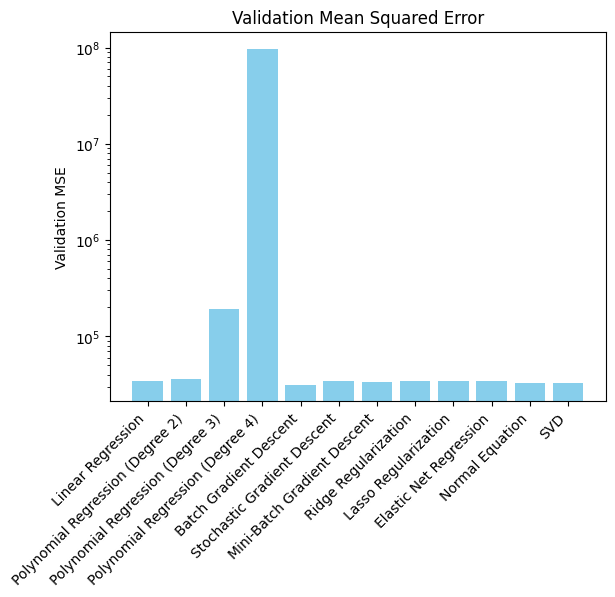

In [ ]:
#Plot Validation MSE
fig, plot = plt.subplots()
plot.bar(x, mse_val_scores, color='skyblue')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models_val, rotation=45, ha='right')
plot.set_ylabel('Validation MSE')
plot.set_title('Validation Mean Squared Error')
plt.show()


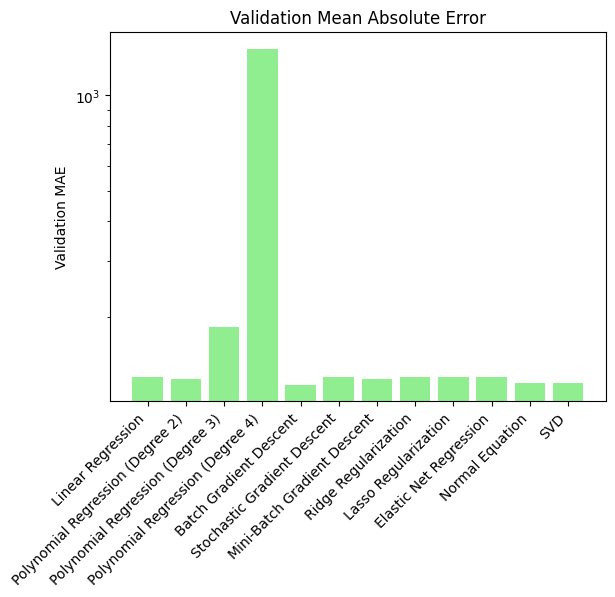

In [ ]:
# ========== Plot Validation MAE ==========
fig, plot = plt.subplots()
plot.bar(x, mae_val_scores, color='lightgreen')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models_val, rotation=45, ha='right')
plot.set_ylabel('Validation MAE')
plot.set_title('Validation Mean Absolute Error')
plt.show()


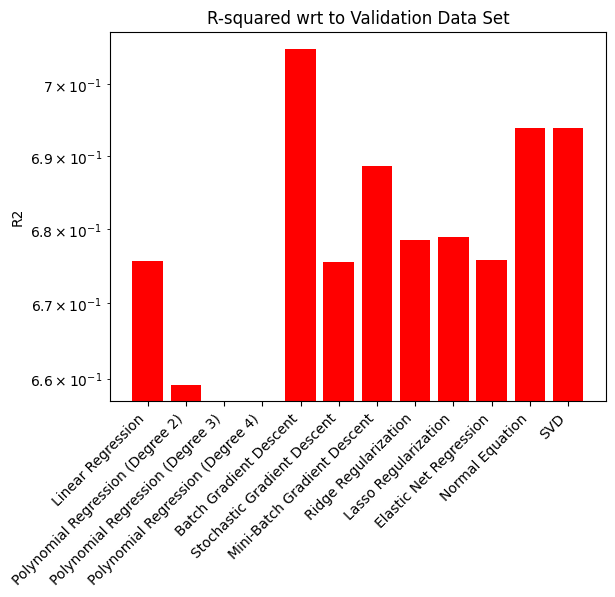

In [ ]:
# ========== Plot Validation R² ==========
# Plot R-squared
fig, plot= plt.subplots()
plot.bar(x, r2_val_scores, color='red')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models_val, rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('R2')
plot.set_title('R-squared wrt to Validation Data Set')
plt.show()

Plot The Perfomance metric with Respect to Test Dataset

In [ ]:
models = ['Linear Regression', 'Polynomial Regression (Degree 2)', 'Polynomial Regression (Degree 3)',
'Polynomial Regression (Degree 4)', 'Batch Gradient Descent', 'Stochastic Gradient Descent',
'Mini-Batch Gradient Descent','Ridge Regularization', 'Lasso Regularization',
'Elastic Net Regression','Normal Equation','SVD']

mse_scores = [mse_lr, mse_poly_2, mse_poly_3, mse_poly_4, mse_bgd, mse_sgd, mse_mbgd,

mse_ridge_reg, mse_lasso_reg, mse_enet_reg, mse_ne, mse_svd]

mae_scores = [mae_lr, mae_poly_2, mae_poly_3, mae_poly_4, mae_bgd, mae_sgd, mae_mbgd,

mae_ridge_reg, mae_lasso_reg, mae_enet_reg, mae_ne, mae_svd]
r2_scores = [r2_lr, r2_poly_2, r2_poly_3, r2_poly_4, r2_bgd, r2_sgd, r2_mbgd,

r2_ridge_reg, r2_lasso_reg, r2_enet_reg, r2_ne, r2_svd]

x = range(len(models))

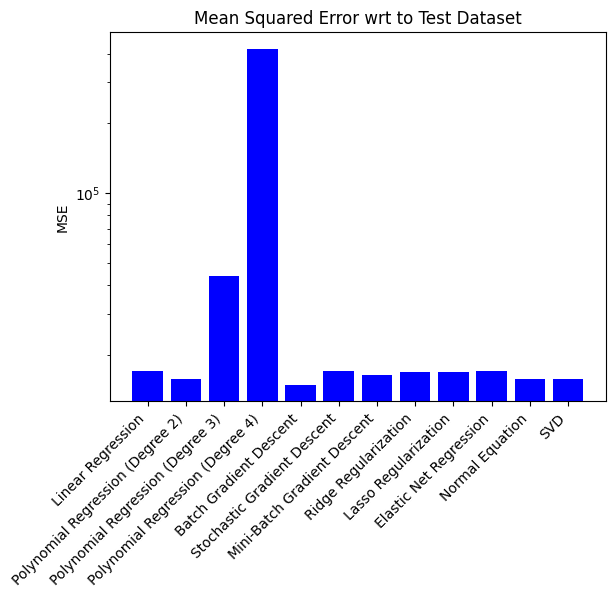

In [ ]:
# Plot Mean Squared Error
fig, plot= plt.subplots()
plot.bar(x, mse_scores, color='blue')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models, rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('MSE')
plot.set_title('Mean Squared Error wrt to Test Dataset')
plt.show()

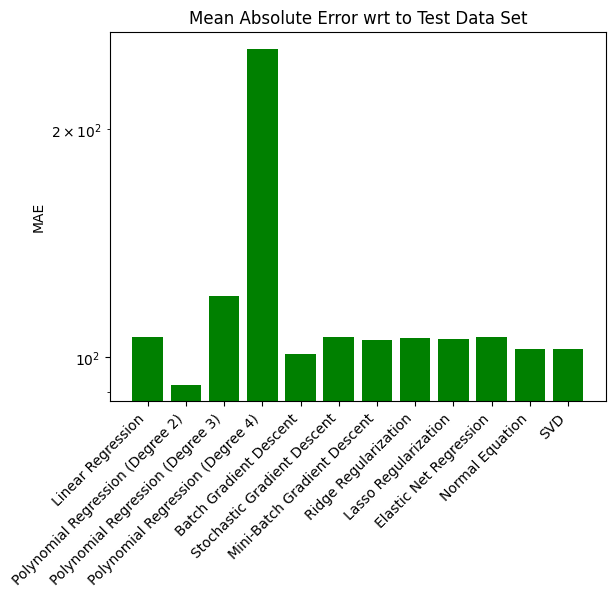

In [ ]:
# Plot Mean Absolute Error
fig, plot= plt.subplots()
plot.bar(x, mae_scores, color='green')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models, rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('MAE')
plot.set_title('Mean Absolute Error wrt to Test Data Set')
plt.show()

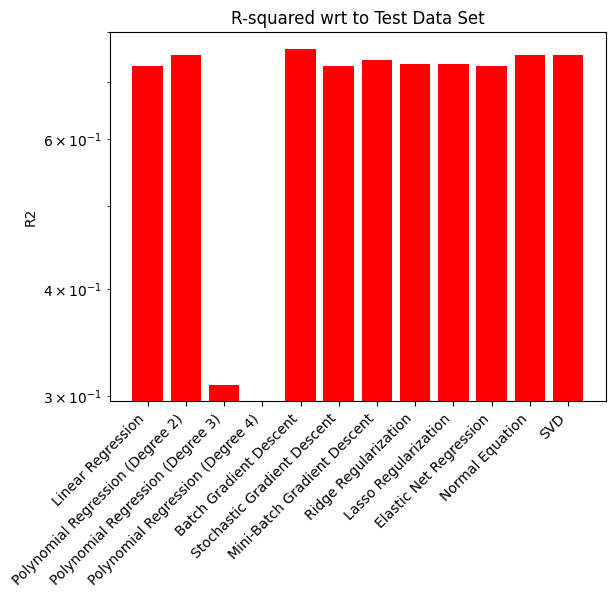

In [ ]:
# Plot R-squared
fig, plot= plt.subplots()
plot.bar(x, r2_scores, color='red')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models, rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('R2')
plot.set_title('R-squared wrt to Test Data Set')
plt.show()



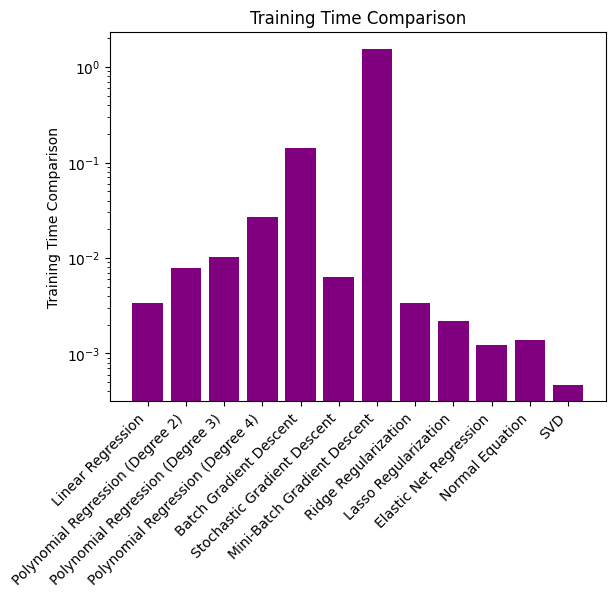

In [ ]:
# Computational Time Plot
training_times = [training_time_linear, training_time_poly_2, training_time_poly_3,

training_time_poly_4, training_time_bgd, training_time_sgd, training_time_mbgd,
training_time_ridge_reg, training_time_lasso_reg, training_time_elastic_net_reg,
training_time_ne, training_time_svd]

fig, plot= plt.subplots()
plot.bar(x, training_times, color='purple')
plot.set_yscale('log')
plot.set_xticks(x)
plot.set_xticklabels(models, rotation=45, ha='right') # Set the xtick labels
plot.set_ylabel('Training Time Comparison')
plot.set_title('Training Time Comparison')
plt.show()

After Implementing K-Fold Validation Plot

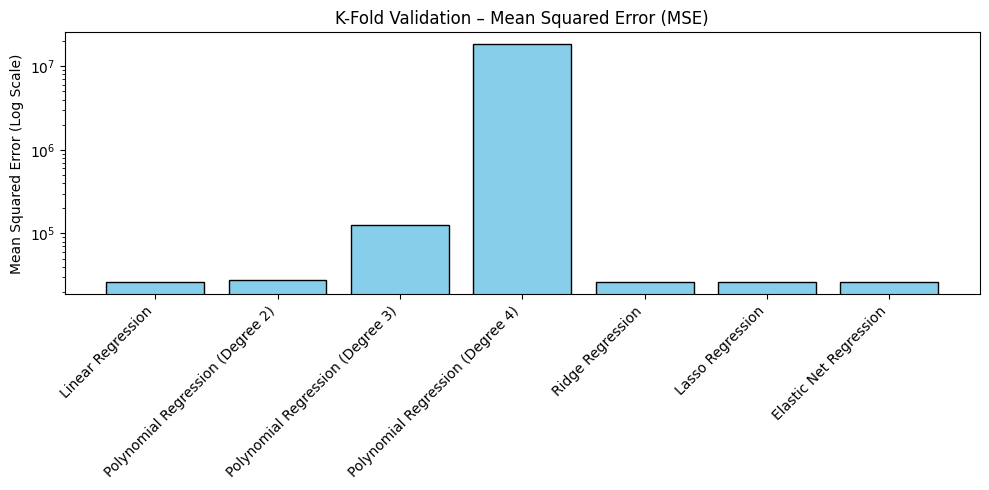

In [ ]:
import matplotlib.pyplot as plt

x = range(len(models_kfold))

# -------------------- Plot 1 : MSE --------------------
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, mse_kfold, color='skyblue', edgecolor='black')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(models_kfold, rotation=45, ha='right')
ax.set_ylabel('Mean Squared Error (Log Scale)')
ax.set_title('K-Fold Validation – Mean Squared Error (MSE)')
plt.tight_layout()
plt.show()



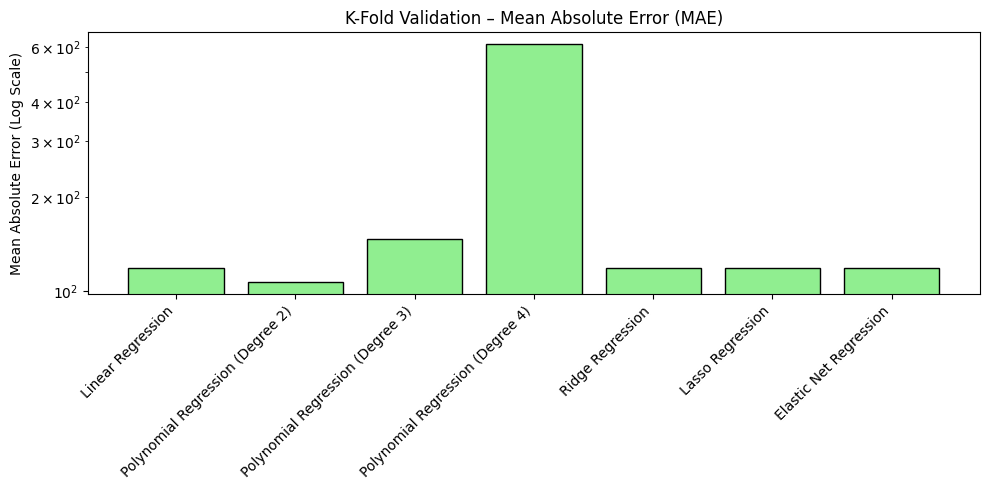

In [ ]:
# -------------------- Plot 2 : MAE --------------------
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, mae_kfold, color='lightgreen', edgecolor='black')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(models_kfold, rotation=45, ha='right')
ax.set_ylabel('Mean Absolute Error (Log Scale)')
ax.set_title('K-Fold Validation – Mean Absolute Error (MAE)')
plt.tight_layout()
plt.show()



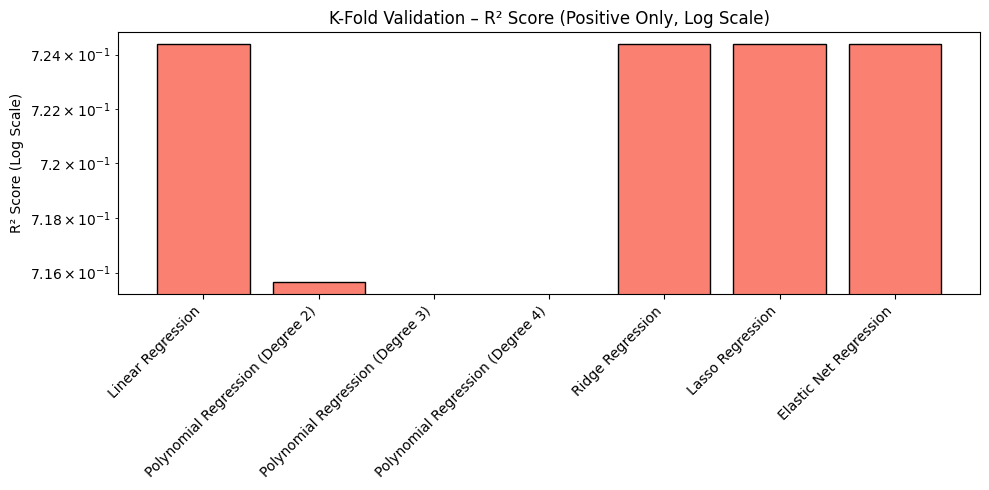

In [ ]:
# -------------------- Plot 3 : R² --------------------
r2_positive = [r if r > 0 else 0 for r in r2_kfold]

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, r2_positive, color='salmon', edgecolor='black')
ax.set_yscale('log')
ax.set_xticks(x)
ax.set_xticklabels(models_kfold, rotation=45, ha='right')
ax.set_ylabel('R² Score (Log Scale)')
ax.set_title('K-Fold Validation – R² Score (Positive Only, Log Scale)')
plt.tight_layout()
plt.show()
